# Descarga y procesado de datos:
Cómo utilizar [Yahoo Finance](https://es.finance.yahoo.com/) para obtener datos de bolsa

In [ ]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Usamos la librería ***yfinance***

https://pypi.org/project/yfinance/

In [ ]:
# Nuestro protragonista:
!pip install yfinance > /dev/null 2>&1 # Si no lo tenemos hay que instalarlo!
# COLAB usa Linux por debajo, '> /dev/null 2>&1' indica que no queremos ver output
import yfinance as yf

In [ ]:
yf.Ticker('TEF').history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1987-06-12 00:00:00-04:00,0.450141,0.468045,0.439911,0.460372,50527023,0.0,0.0
1987-06-15 00:00:00-04:00,0.473160,0.475718,0.460372,0.462930,17437104,0.0,0.0
1987-06-16 00:00:00-04:00,0.462930,0.462930,0.442469,0.445026,14805088,0.0,0.0
1987-06-17 00:00:00-04:00,0.450141,0.450141,0.442469,0.447584,4271542,0.0,0.0
1987-06-18 00:00:00-04:00,0.447584,0.468045,0.447584,0.468045,8514571,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-28 00:00:00-05:00,3.790000,3.790000,3.690000,3.700000,2180000,0.0,0.0
2022-11-29 00:00:00-05:00,3.690000,3.740000,3.690000,3.690000,799400,0.0,0.0
2022-11-30 00:00:00-05:00,3.700000,3.720000,3.670000,3.720000,1048100,0.0,0.0


**Otros:**
- Pandas Datareader https://pandas-datareader.readthedocs.io/en/latest/
- Pandas Finance https://pypi.org/project/pandas-finance/ 
- InvestPy https://investpy.readthedocs.io/

**Otros (Avanzado):**

- Theta Data https://www.thetadata.net/ 
- Interactive Brokers https://interactivebrokers.github.io/tws-api/introduction.html 
- Alpha Vantage https://github.com/RomelTorres/alpha_vantage 
- Nasdaq Data Link https://data.nasdaq.com/tools/python 
- Twelve Data https://github.com/twelvedata/twelvedata-python 
- Poligon https://github.com/polygon-io/client-python 
- Tradier https://documentation.tradier.com/brokerage-api/overview/libraries 
- Alpaca-py https://github.com/alpacahq/alpaca-py 
- Finhub-python https://github.com/Finnhub-Stock-API/finnhub-python 
- Marketstack https://marketstack.com/documentation 
- Tiingo https://api.tiingo.com/documentation/general/overview 

## Bajarse datos diarios de 4 activos del máximo tiempo posible:

Definimos los objetos Ticker para cada activo:
Hay 2 formas de hacerlo.

### **1ª forma: ticker por ticker, variable por variable**

In [ ]:
# Creamos UNA VARIABLE para cada acción.
# Usamos el método 'Ticker'. Le valen mayúsculas y minúsculas
msft = yf.Ticker('MSFT')
aapl = yf.Ticker('AAPL')
goog = yf.Ticker('goog')
csco = yf.Ticker('csco')

Hay muchos otros métodos en yfinance, **explóralos!**

### **2ª forma: en masa, lista o acumulación de variables**

In [ ]:
# Hay varias formas, creemos una LISTA con los tickers:
ticks = ['msft', 'aapl', 'goog', 'csco']

In [ ]:
# Podemos pasar esta LISTA al método 'Tickers'
tickers = yf.Tickers(ticks)

# OJO no es lo mismo '.Ticker' que '.Tickers'!!!

In [ ]:
# Cuando tenemos varios tickers, tenemos un diccionario:
tickers.tickers

{'MSFT': yfinance.Ticker object <MSFT>,
 'AAPL': yfinance.Ticker object <AAPL>,
 'GOOG': yfinance.Ticker object <GOOG>,
 'CSCO': yfinance.Ticker object <CSCO>}

In [ ]:
# Podemos definir nombres de variables de manera dinámica usando 'globals()':
for key in tickers.tickers.keys():
  globals()[f'{key}_v2']=tickers.tickers[key]

Como más arriba (en la ***1ª Forma***) hemos definido las variables 1 a 1 a mano, podemos compararlas con estas que hemos creado ahora.

In [ ]:
# Check de que son el mismo objeto:
print(msft)
print(MSFT_v2)

yfinance.Ticker object <MSFT>
yfinance.Ticker object <MSFT>


Ahora podemos descargarnos los datos con el método [.history](https://pypi.org/project/yfinance/). Indicamos que queremos todos los datos con *period='max'*

In [ ]:
# El método 'history' del ticker nos da los datos:
msft.history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-23 00:00:00-05:00,245.110001,248.279999,244.270004,247.580002,19508500,0.0,0.0
2022-11-25 00:00:00-05:00,247.309998,248.699997,246.729996,247.490005,9200800,0.0,0.0
2022-11-28 00:00:00-05:00,246.080002,246.649994,240.800003,241.759995,24778200,0.0,0.0


**Descargar toda la historia de cada uno en una variable:**

In [ ]:
msft_hist = msft.history(period='max') # Microsoft
goog_hist = goog.history(period='max') # Google
aapl_hist = aapl.history(period='max') # Apple
csco_hist = csco.history(period='max') # Cisco

Esto podríamos hacerlo **ampliando el bucle anterior** en vez de ir 1 por 1:

In [ ]:

for key in tickers.tickers.keys():
  # Creamos el objeto 'Ticker' para cada acción
  globals()[f'{key}_v2']=tickers.tickers[key]
  # HASTA AQUÍ ES IGUAL QUE EL ANTERIOR BUCLE! #################################

  # Añadimos una parte que crea 1 nueva variable con la HISTORIA para cada acción.
  # Extractamos su 'history' total
  globals()[f'{key}_hist']=globals()[f'{key}_v2'].history(period='max')

In [ ]:
GOOG_hist # Ejemplo

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0,0.0
...,...,...,...,...,...,...,...
2022-11-23 00:00:00-05:00,97.339996,99.069000,97.339996,98.820000,17568900,0,0.0
2022-11-25 00:00:00-05:00,98.464996,98.940002,97.529999,97.599998,8567800,0,0.0
2022-11-28 00:00:00-05:00,97.199997,97.830002,95.889999,96.250000,19974500,0,0.0


**Extra: ¿cómo conseguir todos los tickers?**
https://github.com/mlapenna7/yh_symbol_universe 

## **Quedarse con los datos útiles. 'Close' por ejemplo:**

Ahora, para **CADA ACCIÓN tenemos un DATAFRAME** con todos los datos y columnas Open, Close, etc...

Para quedarnos con la columna **CLOSE** tan solo tenemos que indicarlo.

In [ ]:
# Ejemplos con Google, todos igual de válidos:
GOOG_hist['Close']
GOOG_hist.Close
GOOG_hist.loc[:,'Close']
GOOG_hist.iloc[:,3]


Date
2004-08-19 00:00:00-04:00     2.499133
2004-08-20 00:00:00-04:00     2.697639
2004-08-23 00:00:00-04:00     2.724787
2004-08-24 00:00:00-04:00     2.611960
2004-08-25 00:00:00-04:00     2.640104
                               ...    
2022-11-23 00:00:00-05:00    98.820000
2022-11-25 00:00:00-05:00    97.599998
2022-11-28 00:00:00-05:00    96.250000
2022-11-29 00:00:00-05:00    95.440002
2022-11-30 00:00:00-05:00    96.209999
Name: Close, Length: 4604, dtype: float64

Lo hacemos para CADA acción:

In [ ]:
msft_close = msft_hist.Close # Microsoft
goog_close = goog_hist.Close # Google
aapl_close = aapl_hist.Close # Apple
csco_close = csco_hist.Close # Cisco

Nuevamente: podríamos haber incluido todo esto en el bucle y hacerlo de golpe!

In [ ]:
# Hacerlo para todos, ampliamos el bucle anterior:

for key in tickers.tickers.keys():
  # Creamos el objeto 'Ticker' para cada acción
  globals()[f'{key}_v2']=tickers.tickers[key]
  # Extractamos su 'history' total
  globals()[f'{key}_hist']=globals()[f'{key}_v2'].history(period='max')
  # HASTA AQUÍ ES IGUAL QUE EL ANTERIOR BUCLE! #################################

  # Nos quedamos con los datos 'Close' en variables terminadas en '_close'.
  globals()[f'{key}_close']=globals()[f'{key}_hist'].Close

GOOG_close

Date
2004-08-19 00:00:00-04:00     2.499133
2004-08-20 00:00:00-04:00     2.697639
2004-08-23 00:00:00-04:00     2.724787
2004-08-24 00:00:00-04:00     2.611960
2004-08-25 00:00:00-04:00     2.640104
                               ...    
2022-11-23 00:00:00-05:00    98.820000
2022-11-25 00:00:00-05:00    97.599998
2022-11-28 00:00:00-05:00    96.250000
2022-11-29 00:00:00-05:00    95.440002
2022-11-30 00:00:00-05:00    96.275002
Name: Close, Length: 4604, dtype: float64

## Análisis preliminar de los datos. Limpieza y pretratado:

Comprobamos que no hay NANs

In [ ]:
print('Microsoft ',msft_close.isnull().sum())
print('Google ', goog_close.isnull().sum())
print('Apple ', aapl_close.isnull().sum())
print('Cisco ', csco_close.isnull().sum())

Microsoft  0
Google  0
Apple  0
Cisco  0


Unimos los datos con [PANDAS CONCAT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html):

In [ ]:
# Pandas 'Concat' por columnas (axis=1). Atención al parámetro 'join':
all_close = pd.concat([MSFT_close, AAPL_close, GOOG_close, CSCO_close],
                      axis=1, # Unimos como columnas
                      join='outer', # Nos quedamos TODAS las fechas
                      keys=ticks) # Nombramos cada columna
print(ticks)
all_close

['msft', 'aapl', 'goog', 'csco']


,msft,aapl,goog,csco
Date,,,,
1980-12-12 00:00:00-05:00,NaN,0.099874,NaN,NaN
1980-12-15 00:00:00-05:00,NaN,0.094663,NaN,NaN
1980-12-16 00:00:00-05:00,NaN,0.087715,NaN,NaN
1980-12-17 00:00:00-05:00,NaN,0.089886,NaN,NaN
1980-12-18 00:00:00-05:00,NaN,0.092492,NaN,NaN
...,...,...,...,...
2022-11-23 00:00:00-05:00,247.580002,151.070007,98.820000,48.570000
2022-11-25 00:00:00-05:00,247.490005,148.110001,97.599998,48.400002
2022-11-28 00:00:00-05:00,241.759995,144.220001,96.250000,48.080002


In [ ]:
# Ahora si hay NAN!
all_close.isnull().sum()

msft    1326
aapl       0
goog    5978
csco    2321
dtype: int64

Tratamiento de NAN:

In [ ]:
# ¿Cómo son nuestros NAN?
all_close.fillna(method='ffill').isnull().sum()

msft    1326
aapl       0
goog    5978
csco    2321
dtype: int64

**Que haya el mismo nº de nan antes y despues del ffill indica que solo hay huecos 'al principio' de cada columna.**

BFILL lo solucionaría, pero, **¿es representativo?** Puede que merezca la pena quedarse solo con las fechas COINCIDENTES.

Hay, como siempre, varias maneras de hacerlo:

In [ ]:
# DROPNA:
all_close_dropna = all_close.dropna()
all_close_dropna

,msft,aapl,goog,csco
Date,,,,
2004-08-19 00:00:00-04:00,17.112516,0.467460,2.499133,13.563480
2004-08-20 00:00:00-04:00,17.162991,0.468830,2.697639,13.407252
2004-08-23 00:00:00-04:00,17.238935,0.473092,2.724787,13.620291
2004-08-24 00:00:00-04:00,17.238935,0.486335,2.611960,13.471164
2004-08-25 00:00:00-04:00,17.435112,0.503079,2.640104,13.719707
...,...,...,...,...
2022-11-23 00:00:00-05:00,247.580002,151.070007,98.820000,48.570000
2022-11-25 00:00:00-05:00,247.490005,148.110001,97.599998,48.400002
2022-11-28 00:00:00-05:00,241.759995,144.220001,96.250000,48.080002


In [ ]:
# INNER JOIN:
all_close_inner = pd.concat([MSFT_close, AAPL_close, GOOG_close, CSCO_close],
                            axis=1,
                            join='inner', # Nos quedamos fechas COMUNES
                            keys=ticks)
all_close_inner

,msft,aapl,goog,csco
Date,,,,
2004-08-19 00:00:00-04:00,17.112516,0.467460,2.499133,13.563480
2004-08-20 00:00:00-04:00,17.162991,0.468830,2.697639,13.407252
2004-08-23 00:00:00-04:00,17.238935,0.473092,2.724787,13.620291
2004-08-24 00:00:00-04:00,17.238935,0.486335,2.611960,13.471164
2004-08-25 00:00:00-04:00,17.435112,0.503079,2.640104,13.719707
...,...,...,...,...
2022-11-23 00:00:00-05:00,247.580002,151.070007,98.820000,48.570000
2022-11-25 00:00:00-05:00,247.490005,148.110001,97.599998,48.400002
2022-11-28 00:00:00-05:00,241.759995,144.220001,96.250000,48.080002


Podemos comprobar como DROPNA y Concat con inner join dan los mismos resultados. Piensa en por qué ocurre esto:

In [ ]:
# Chequeamos si son iguales:
all_close_inner.equals(all_close_dropna)

True

## Graficar evoluciones

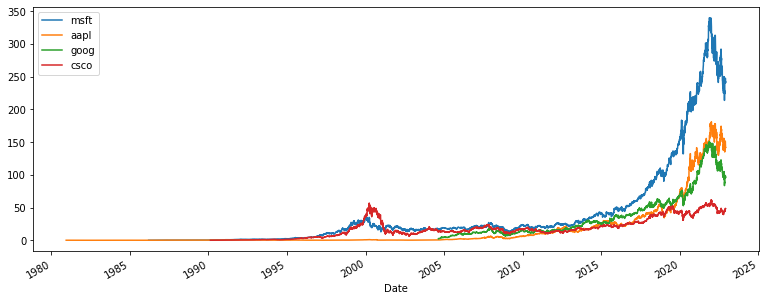

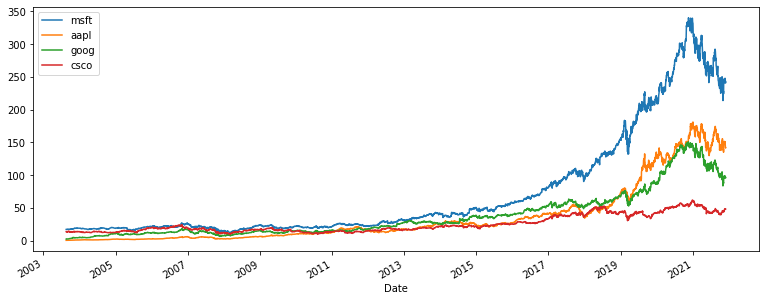

In [ ]:
# OJO al EJE X:
all_close.plot(figsize=(13,5));
all_close_inner.plot(figsize=(13,5));

### **Graficar evolución armonizada desde el primer día:**

Valores del primer día para cada acción. 
 msft    17.112516
aapl     0.467460
goog     2.499133
csco    13.563480
Name: 2004-08-19 00:00:00-04:00, dtype: float64 

Gráfica de los valores armonizados


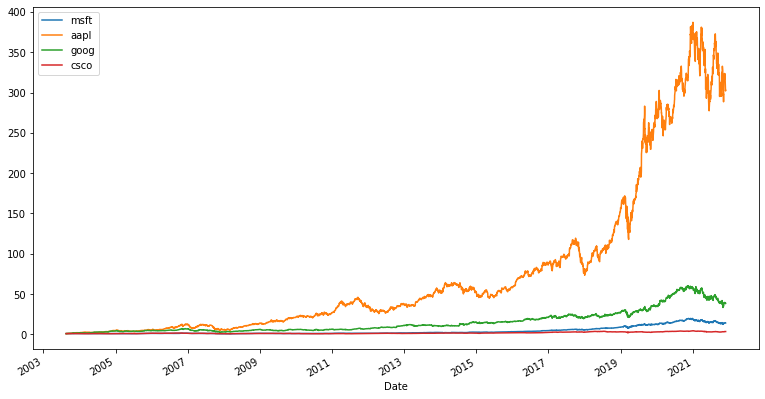

In [ ]:
all_close_armonizado = all_close_inner.copy() # Generamos una copia para no 'pisar' datos.

valores_primera_fila = all_close_armonizado.iloc[0] # Valores del primer día
print('Valores del primer día para cada acción. \n',valores_primera_fila, '\n')
# Dividimos TODOS los valores entre los valores del primer día
# Como 'valores_primera_fila' tiene un valor por cada columna, Pandas ya sabe
# que queremos referirnos a las columnas
all_close_armonizado = all_close_armonizado / valores_primera_fila
print('Gráfica de los valores armonizados')
all_close_armonizado.plot(figsize=(13,7));

OJO a cómo Apple es ahora mucho más atractiva en esta tabla que Microsoft!

### **Graficar evolución de los retornos:**

In [ ]:
# RETORNOS PORCENTUALES:
all_close_ret = all_close_inner.pct_change()
print('Retornos normales')
print(all_close_ret.head(), '\n\n')

# RETORNOS LOGARITMICOS:
all_close_lret = np.log(all_close_inner) - np.log(all_close_inner.shift(1))
print('Retornos Logarítmicos')
print(all_close_lret.head())

Retornos normales
                               msft      aapl      goog      csco
Date                                                             
2004-08-19 00:00:00-04:00       NaN       NaN       NaN       NaN
2004-08-20 00:00:00-04:00  0.002950  0.002930  0.079430 -0.011518
2004-08-23 00:00:00-04:00  0.004425  0.009091  0.010064  0.015890
2004-08-24 00:00:00-04:00  0.000000  0.027994 -0.041408 -0.010949
2004-08-25 00:00:00-04:00  0.011380  0.034429  0.010775  0.018450 


Retornos Logarítmicos
                               msft      aapl      goog      csco
Date                                                             
2004-08-19 00:00:00-04:00       NaN       NaN       NaN       NaN
2004-08-20 00:00:00-04:00  0.002945  0.002926  0.076433 -0.011585
2004-08-23 00:00:00-04:00  0.004415  0.009050  0.010013  0.015765
2004-08-24 00:00:00-04:00  0.000000  0.027609 -0.042289 -0.011009
2004-08-25 00:00:00-04:00  0.011316  0.033850  0.010717  0.018282


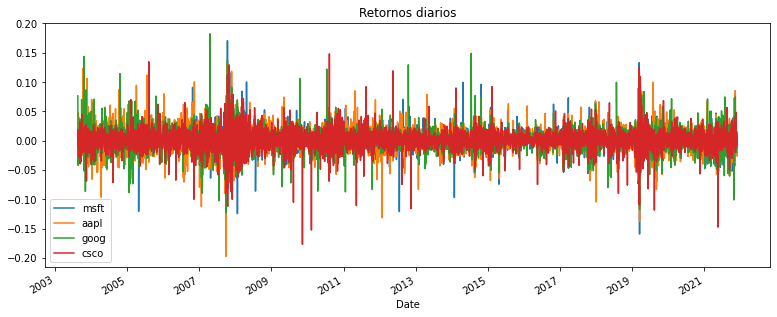

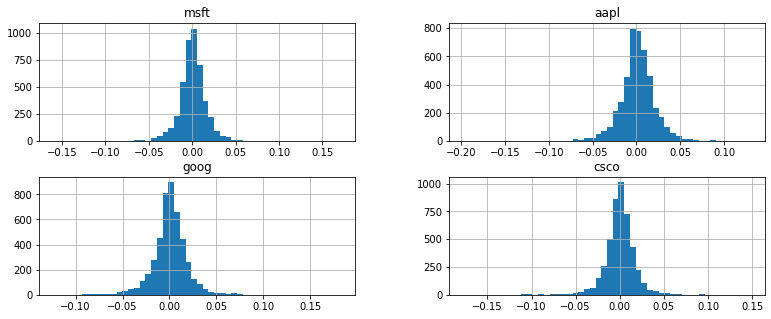

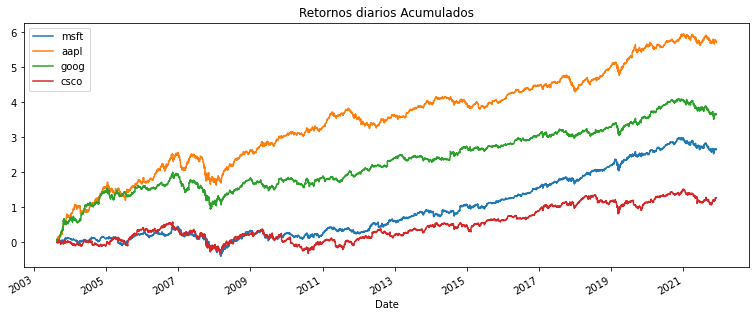

In [ ]:
# Observemos estos datos:
all_close_lret.plot(figsize=(13,5),
                    title='Retornos diarios'); # Retornos diarios
all_close_lret.hist(figsize=(13,5), bins=50); # Retornos diarios
all_close_lret.cumsum().plot(figsize=(13,5),
                             title='Retornos diarios Acumulados'); # Acumulación

## **Añadir y graficar otros aspectos útiles:**
- Evolución temporal en semanas y meses.
- Calcular retornos y volatilidades para la evolución de precios.

### **Metodo Directo:**
**¿Qué problema tiene?**

In [ ]:
all_close_inner.asfreq('M')

,msft,aapl,goog,csco
Date,,,,
2004-08-31 00:00:00-04:00,17.276897,0.524998,2.549693,13.322034
2004-09-30 00:00:00-04:00,17.498404,0.589842,3.227901,12.853350
2004-10-31 00:00:00-04:00,NaN,NaN,NaN,NaN
2004-11-30 00:00:00-05:00,18.910191,1.020618,4.532511,13.314935
2004-12-31 00:00:00-05:00,18.846714,0.980281,4.801752,13.719707
...,...,...,...,...
2022-07-31 00:00:00-04:00,NaN,NaN,NaN,NaN
2022-08-31 00:00:00-04:00,260.735199,156.959625,109.150002,44.308434
2022-09-30 00:00:00-04:00,232.245483,137.971115,96.150002,39.631874


Busca el **último día de cada mes** y, si no hay dato, nos pone un NAN. **Ignora completamente si tenemos datos el penultimo día u otro**.

### **Otro método: Más complejo pero 100% correcto:**

Lo anterior tiene un problema, si al final del mes no tenemos dato en **exactamente** el último día no nos mostrará ese dato.

Forma **COMPLETA** de hacerlo:

In [ ]:
# Pasando el 'datetimeindex' a otro periodo obtenemos los siguientes meses:
all_close_inner.index.to_period('M')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


PeriodIndex(['2004-08', '2004-08', '2004-08', '2004-08', '2004-08', '2004-08',
             '2004-08', '2004-08', '2004-08', '2004-09',
             ...
             '2022-11', '2022-11', '2022-11', '2022-11', '2022-11', '2022-11',
             '2022-11', '2022-11', '2022-11', '2022-11'],
            dtype='period[M]', name='Date', length=4604)

In [ ]:
# Hacemos un GROUPBY por esos meses:
indice_agrupado = all_close_inner.index.groupby(all_close_inner.index.to_period('M'))
################### ^'Coge el índice'^ # ^'Agrúpalo por'^ # ^'Los meses que tenemos'^

In [ ]:
ultimos_de_mes = []
# Para cada mes en el agrupado tenemos TODOS los días de ese mes.
# Cogemos el máximo (último dia disponible) usando 'max':
for mes in indice_agrupado:
  ultimos_de_mes.append(indice_agrupado[mes].max())

In [ ]:
all_close_inner.loc[ultimos_de_mes]

,msft,aapl,goog,csco
Date,,,,
2004-08-31 00:00:00-04:00,17.276897,0.524998,2.549693,13.322034
2004-09-30 00:00:00-04:00,17.498404,0.589842,3.227901,12.853350
2004-10-29 00:00:00-04:00,17.700918,0.797619,4.748203,13.641593
2004-11-30 00:00:00-05:00,18.910191,1.020618,4.532511,13.314935
2004-12-31 00:00:00-05:00,18.846714,0.980281,4.801752,13.719707
...,...,...,...,...
2022-07-29 00:00:00-04:00,279.358093,162.015808,116.639999,44.952450
2022-08-31 00:00:00-04:00,260.735199,156.959625,109.150002,44.308434
2022-09-30 00:00:00-04:00,232.245483,137.971115,96.150002,39.631874


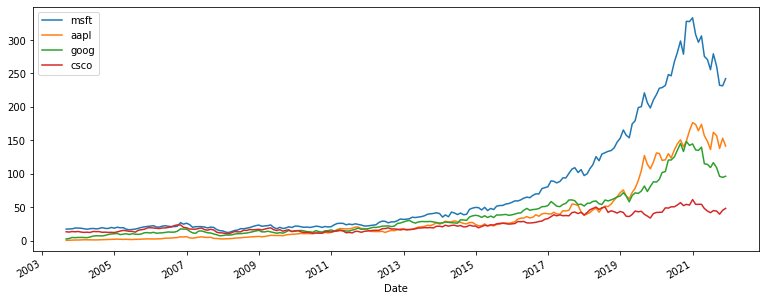

In [ ]:
all_close_inner.loc[ultimos_de_mes].plot(figsize=(13,5));

**Se puede hacer todo en 1 línea!**

In [ ]:
df_mensual = all_close_inner.iloc[all_close_inner.reset_index().groupby(all_close_inner.index.to_period('M'))['Date'].idxmax()]
df_mensual

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,msft,aapl,goog,csco
Date,,,,
2004-08-31 00:00:00-04:00,17.276897,0.524998,2.549693,13.322034
2004-09-30 00:00:00-04:00,17.498404,0.589842,3.227901,12.853350
2004-10-29 00:00:00-04:00,17.700918,0.797619,4.748203,13.641593
2004-11-30 00:00:00-05:00,18.910191,1.020618,4.532511,13.314935
2004-12-31 00:00:00-05:00,18.846714,0.980281,4.801752,13.719707
...,...,...,...,...
2022-07-29 00:00:00-04:00,279.358093,162.015808,116.639999,44.952450
2022-08-31 00:00:00-04:00,260.735199,156.959625,109.150002,44.308434
2022-09-30 00:00:00-04:00,232.245483,137.971115,96.150002,39.631874


**Para cambiar a semana basta con cambiar el periodo referenciado**

## Medias móviles para los datos semanales y mensuales:

In [ ]:
retornos_mensuales = np.log(df_mensual) - np.log(df_mensual.shift(1))

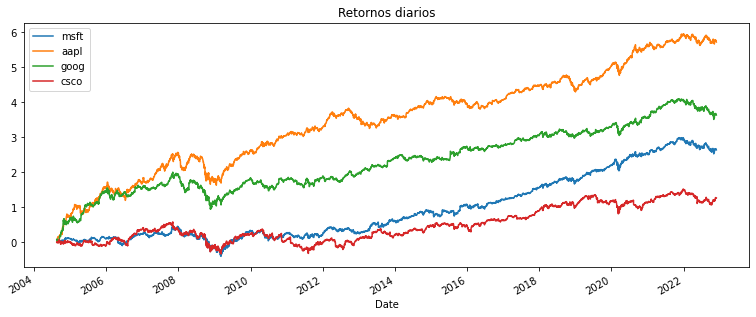

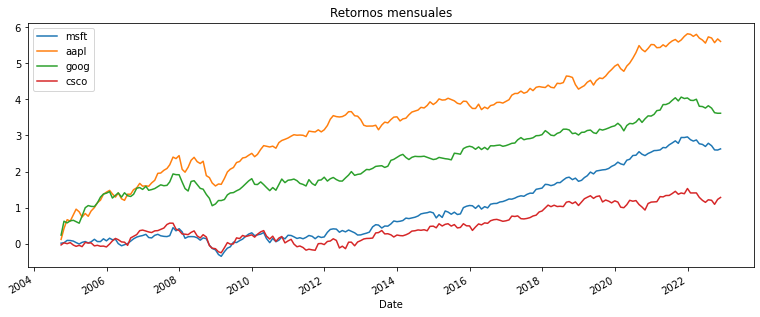

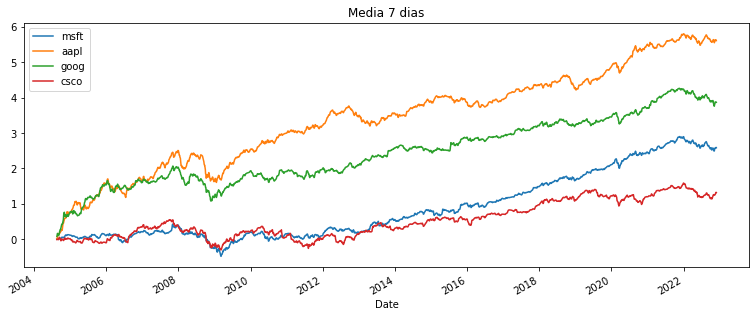

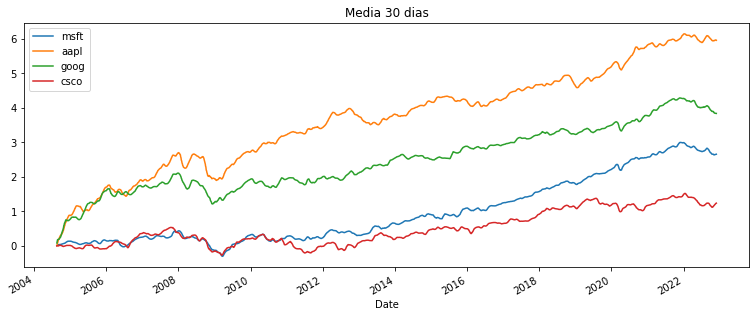

In [ ]:
all_close_lret.cumsum().plot(figsize=(13,5), title='Retornos diarios');
retornos_mensuales.cumsum().plot(figsize=(13,5), title='Retornos mensuales');
all_close_lret.rolling(window='7D').mean().cumsum().plot(figsize=(13,5), title='Media 7 dias');
all_close_lret.rolling(window='30D').mean().cumsum().plot(figsize=(13,5), title='Media 30 dias');

## Calcular otros parámetros:
- Máximo Drawdown.
- Pérdida máxima a una probabilidad determinada (95%).
- Evolución de la volatilidad según marco temporal.
- Indicadores.
  - MACD
  - Sharpe
  - Etc.

**DRAWDAWN:**

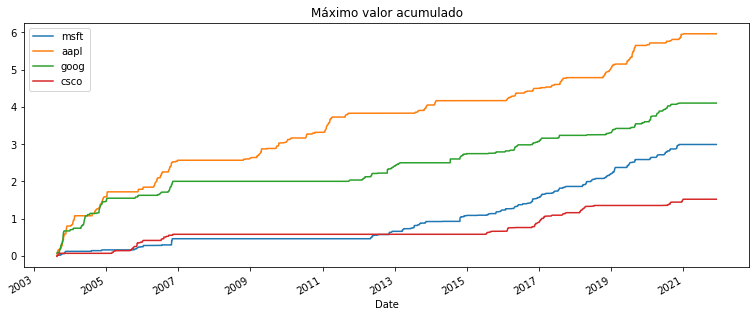

In [ ]:
# MAX DRAWDAWN:
retornos_acumulados = all_close_lret.cumsum()
maximo_acumulado = retornos_acumulados.cummax()
maximo_acumulado.plot(figsize=(13,5), title='Máximo valor acumulado');

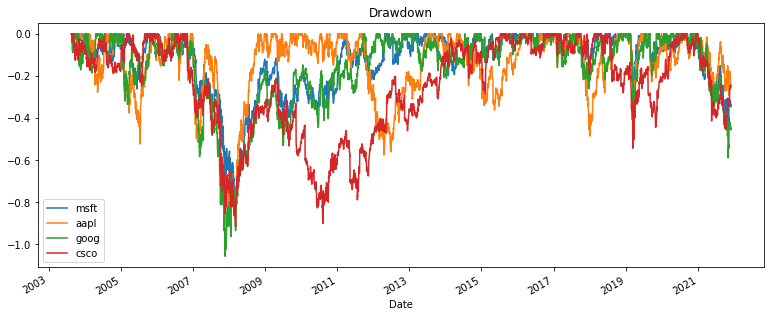

In [ ]:
drawdown = retornos_acumulados - maximo_acumulado
drawdown.plot(figsize=(13,5), title='Drawdown');

**PÉRDIDA ESPERABLE:**

In [ ]:
print('Pérdida máxima al 95% de probabilidad en 1 semana')
print((all_close_lret.rolling(5).mean()*(252**0.5)).quantile(0.05))
print('\n Pérdida máxima al 95% de probabilidad en 1 mes')
print((all_close_lret.rolling(21).mean()*(252**0.5)).quantile(0.05))
print('\n Pérdida máxima al 95% de probabilidad en 6 meses')
print((all_close_lret.rolling(126).mean()*(252**0.5)).quantile(0.05))

Pérdida máxima al 95% de probabilidad en 1 semana
msft   -0.167649
aapl   -0.219837
goog   -0.204648
csco   -0.195809
Name: 0.05, dtype: float64

 Pérdida máxima al 95% de probabilidad en 1 mes
msft   -0.072413
aapl   -0.101222
goog   -0.091674
csco   -0.094545
Name: 0.05, dtype: float64

 Pérdida máxima al 95% de probabilidad en 6 meses
msft   -0.026517
aapl   -0.031932
goog   -0.029411
csco   -0.034202
Name: 0.05, dtype: float64


In [ ]:
perd_esp_95 = pd.DataFrame(data = {'1 semana': (all_close_lret.rolling(5).mean()*(252**0.5)).quantile(0.05),
                                   '1 mes': (all_close_lret.rolling(21).mean()*(252**0.5)).quantile(0.05),
                                   '6 meses': (all_close_lret.rolling(126).mean()*(252**0.5)).quantile(0.05)})
perd_esp_95

,1 semana,1 mes,6 meses
msft,-0.167649,-0.072413,-0.026517
aapl,-0.219837,-0.101222,-0.031932
goog,-0.204648,-0.091674,-0.029411
csco,-0.195809,-0.094545,-0.034202


**VOLATILIDAD:**

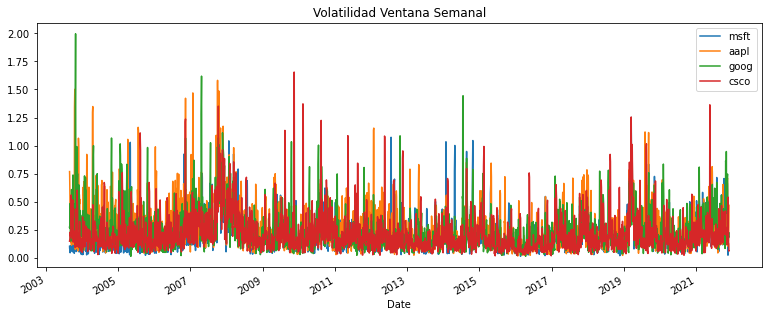

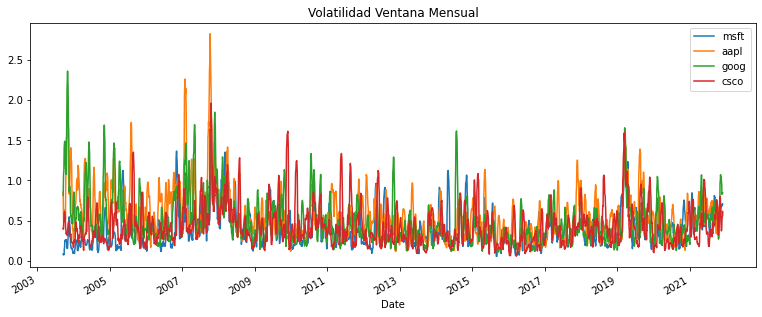

In [ ]:
(retornos_acumulados.rolling(5).std()*(252**0.5)).plot(figsize=(13,5), title='Volatilidad Ventana Semanal');
(retornos_acumulados.rolling(21).std()*(252**0.5)).plot(figsize=(13,5), title='Volatilidad Ventana Mensual');

Mejor veamos en histograma:

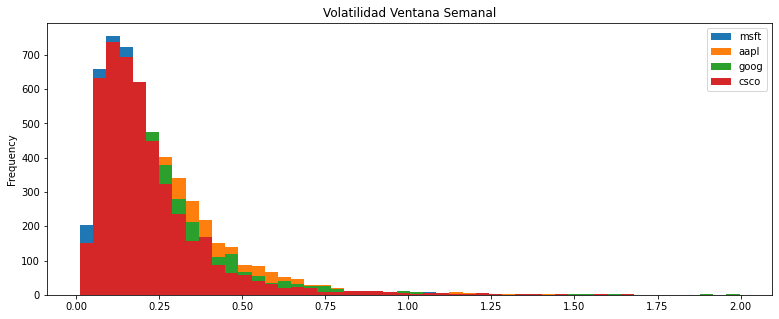

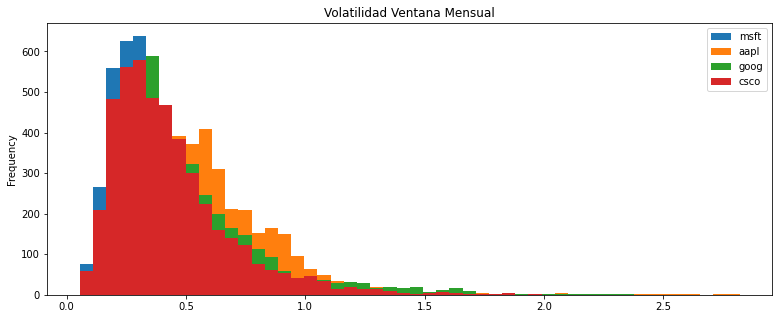

In [ ]:
(retornos_acumulados.rolling(5).std()*(252**0.5)).plot.hist(figsize=(13,5), bins=50, title='Volatilidad Ventana Semanal');
(retornos_acumulados.rolling(21).std()*(252**0.5)).plot.hist(figsize=(13,5), bins=50, title='Volatilidad Ventana Mensual');

**Sharpe Ratio**

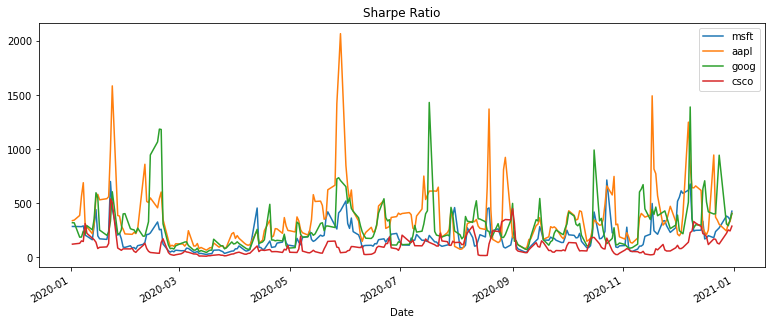

In [ ]:
((retornos_acumulados.rolling(5).mean())/(retornos_acumulados.rolling(5).std())).loc['2020'].plot(figsize=(13,5), title='Sharpe Ratio');

**MACD** Diferencia de medias móviles:

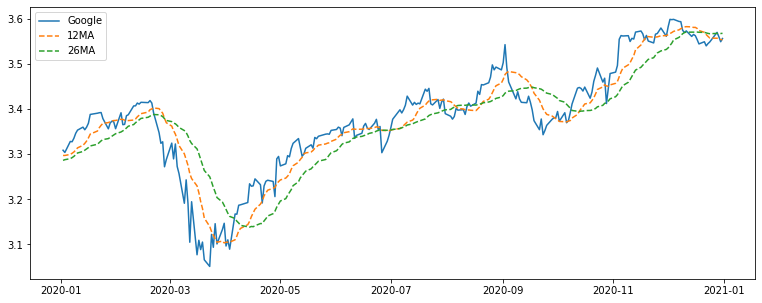

In [ ]:
fig = plt.figure(figsize=(13,5))
plt.plot(retornos_acumulados.goog.loc['2020'], label='Google')
plt.plot(retornos_acumulados.rolling(12).mean().goog.loc['2020'], '--', label='12MA')
plt.plot(retornos_acumulados.rolling(26).mean().goog.loc['2020'], '--', label='26MA')
plt.legend()
plt.show()

## Extra: Plot 3d

No funciona en Google Colab :(

In [ ]:
z = np.linspace(0, 100, 1000)
x = np.sin(z)
y = np.cos(z)

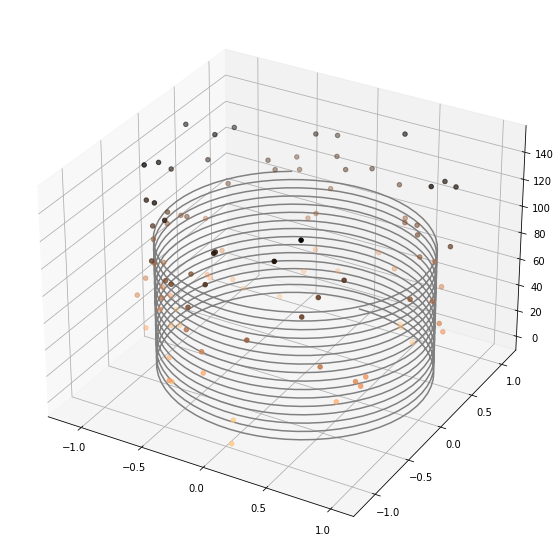

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Línea:
ax.plot3D(x, y, z, 'gray');

zdata = 150 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='copper_r');

In [ ]:
# !pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


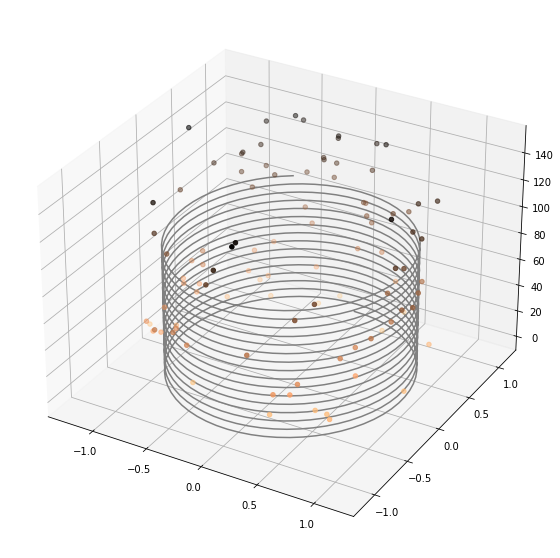

In [ ]:
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Línea:
ax.plot3D(x, y, z, 'gray');

zdata = 150 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='copper_r');